In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = "C:/Users/IZONEPCCOM/Downloads/data_log.csv"
df = pd.read_csv(file_path)

# Show the first few rows and column names to understand the structure
df.head(), df.columns


(             Date Time  Temperature  Humidity
 0  2025-04-04 17:20:51        38.15     41.44
 1  2025-04-04 17:21:50        38.54     41.74
 2  2025-04-04 17:22:50        38.29     41.56
 3  2025-04-04 17:23:50        38.77     41.36
 4  2025-04-04 17:24:50        37.94     41.18,
 Index(['Date Time', 'Temperature', 'Humidity'], dtype='object'))

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Use only the Temperature column for modeling
temperature = df['Temperature'].values

# Function to create dataset with lookback (past_n values)
def create_dataset(data, past_n):
    X, y = [], []
    for i in range(past_n, len(data) - 10):
        X.append(data[i - past_n:i])
        y.append(data[i + 10])  # predict 10 minutes ahead
    return np.array(X), np.array(y)

# Create datasets for 5 and 50-minute lookbacks
X_5, y_5 = create_dataset(temperature, 5)
X_50, y_50 = create_dataset(temperature, 50)

# Train-test split
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5, test_size=0.2, random_state=42)
X_50_train, X_50_test, y_50_train, y_50_test = train_test_split(X_50, y_50, test_size=0.2, random_state=42)

# Initialize models
lr = LinearRegression()
svr = SVR()

# Train and predict for all models
results = {}

# Linear Regression - 5 points
lr.fit(X_5_train, y_5_train)
pred_lr_5 = lr.predict(X_5_test)
results['LR_5'] = (mean_absolute_error(y_5_test, pred_lr_5), mean_squared_error(y_5_test, pred_lr_5, squared=False))

# Linear Regression - 50 points
lr.fit(X_50_train, y_50_train)
pred_lr_50 = lr.predict(X_50_test)
results['LR_50'] = (mean_absolute_error(y_50_test, pred_lr_50), mean_squared_error(y_50_test, pred_lr_50, squared=False))

# SVR - 5 points
svr.fit(X_5_train, y_5_train)
pred_svr_5 = svr.predict(X_5_test)
results['SVR_5'] = (mean_absolute_error(y_5_test, pred_svr_5), mean_squared_error(y_5_test, pred_svr_5, squared=False))

# SVR - 50 points
svr.fit(X_50_train, y_50_train)
pred_svr_50 = svr.predict(X_50_test)
results['SVR_50'] = (mean_absolute_error(y_50_test, pred_svr_50), mean_squared_error(y_50_test, pred_svr_50, squared=False))

import pandas as pd
results_df = pd.DataFrame(results, index=["MAE", "RMSE"]).T
results_df


C:\Users\IZONEPCCOM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\IZONEPCCOM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\IZONEPCCOM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calcula

,MAE,RMSE
LR_5,0.991041,1.646082
LR_50,0.875689,1.434040
SVR_5,0.753011,1.399603
SVR_50,0.618184,1.142305


C:\Users\IZONEPCCOM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 0.0650 - mae: 0.1978 - val_loss: 0.0064 - val_mae: 0.0693
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0181 - mae: 0.0897 - val_loss: 0.0048 - val_mae: 0.0580
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0148 - mae: 0.0795 - val_loss: 0.0052 - val_mae: 0.0613
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0153 - mae: 0.0821 - val_loss: 0.0074 - val_mae: 0.0761
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0151 - mae: 0.0803 - val_loss: 0.0058 - val_mae: 0.0650
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0120 - mae: 0.0718 - val_loss: 0.0073 - val_mae: 0.0753
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0128 - mae: 0.0750 - val_loss: 0.0044 - val_mae: 0.0545
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0119 - mae: 0.0729 - val_loss: 0.0049 - val_mae: 0.0584
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - lo

C:\Users\IZONEPCCOM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


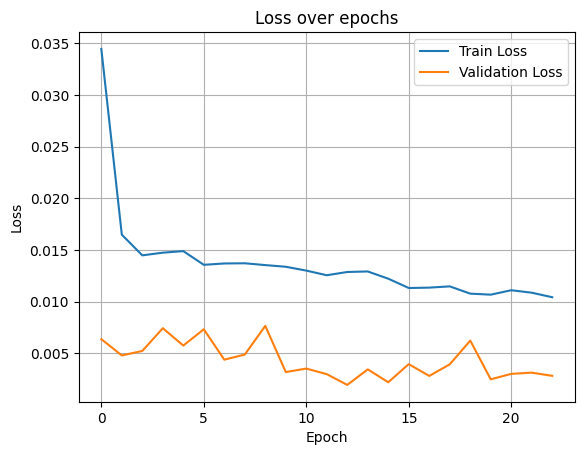

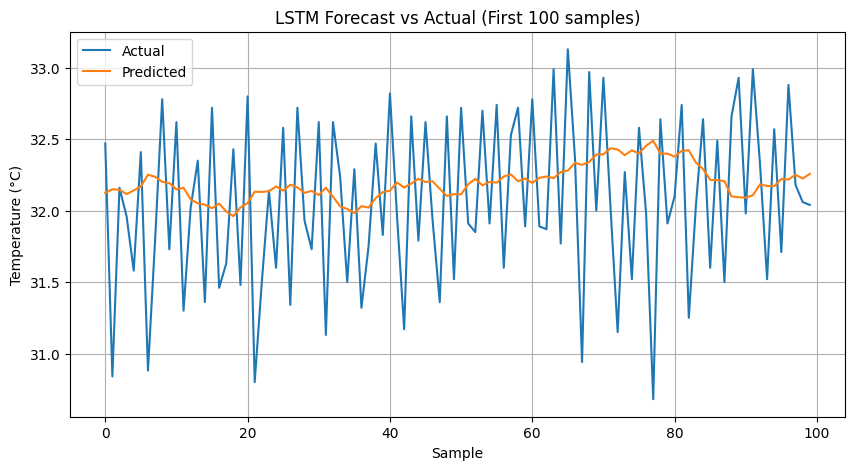

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv("C:/Users/IZONEPCCOM/Downloads/data_log.csv")
temperature = df['Temperature'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(temperature)

# Function to create sequences
def create_lstm_dataset(data, look_back=60, look_ahead=10):
    X, y = [], []
    for i in range(look_back, len(data) - look_ahead):
        X.append(data[i - look_back:i])
        y.append(data[i + look_ahead])
    return np.array(X), np.array(y)

X, y = create_lstm_dataset(temperature_scaled, 60, 10)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop], verbose=1)

# Predict and inverse scale
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Evaluate
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
print(f"LSTM MAE: {mae:.4f}")
print(f"LSTM RMSE: {rmse:.4f}")

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Compare predictions with actual
plt.figure(figsize=(10,5))
plt.plot(y_test_inv[:100], label='Actual')
plt.plot(y_pred_inv[:100], label='Predicted')
plt.title('LSTM Forecast vs Actual (First 100 samples)')
plt.xlabel('Sample')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()


In [5]:
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(temperature.reshape(-1, 1))


In [6]:
y_pred = model.predict(X_test)
y_lstm_pred_inv = scaler.inverse_transform(y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [7]:
import pandas as pd

# ตัวอย่าง: สร้าง DataFrame ที่รวมค่าจริงกับค่าทำนายจากทุกโมเดล (เฉพาะ 100 ตัวอย่างแรก)
df_pred = pd.DataFrame({
    'Actual': y_5_test[:100],                   # ค่าจริง (ใช้ของ LR-5 เป็น reference)
    'LR_5': pred_lr_5[:100],
    'LR_50': pred_lr_50[:100],
    'SVR_5': pred_svr_5[:100],
    'SVR_50': pred_svr_50[:100],
    'LSTM': y_lstm_pred_inv[:100].flatten()     # แปลงจาก 2D เป็น 1D
})

print(df_pred.head())


   Actual       LR_5      LR_50      SVR_5     SVR_50       LSTM
0   36.02  36.440637  35.588543  36.447002  37.825939  32.124695
1   38.05  36.668361  35.061672  37.320469  35.003127  32.149723
2   31.69  33.537205  32.909149  32.879343  32.357350  32.146679
3   34.43  34.920819  34.967928  35.232852  35.406999  32.116020
4   33.77  34.689987  34.917334  33.996282  34.716398  32.141857


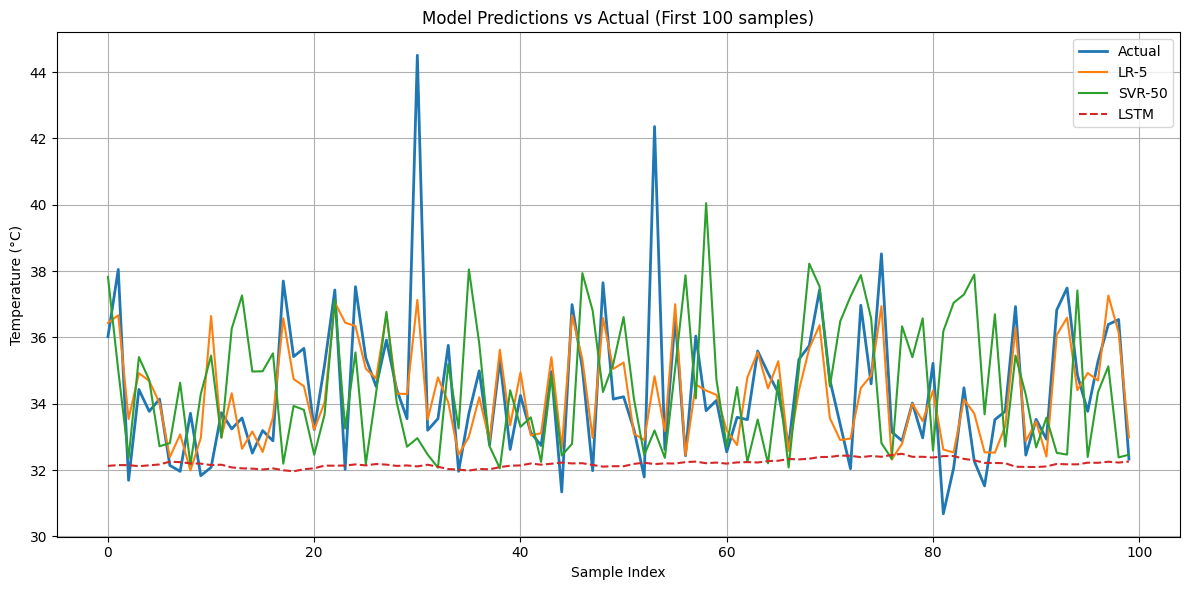

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_pred['Actual'].values, label='Actual', linewidth=2)
plt.plot(df_pred['LR_5'], label='LR-5')
plt.plot(df_pred['SVR_50'], label='SVR-50')
plt.plot(df_pred['LSTM'], label='LSTM', linestyle='--')
plt.title('Model Predictions vs Actual (First 100 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
